# Домашнее задание 3

## Требования ко всем графикам:
1. все зависимости (данные) должны быть оформлены по-разному (либо разные цвета, либо разные маркеры и пр.)
2. должны присутствовать подписи:
    1. к фигуре
    2. к рисунку (axes)
    3. к каждой оси (xlabel )
    4. (*legend*) к данным

## Задание 1 $\textcolor{yellow}{[6\;баллов]}$

Создайте квадрат $S$ со стороной $a=1$  и координатами левой нижней и правой верхней точек $(0,0)$ и $(1,1)$ соответственно. Впишите в квадрат окружность $C$ , созданную:
1. в декартовых координатах $\textcolor{yellow}{[1\;балл]}$
2. в полярных координатах $\textcolor{yellow}{[1\;балл]}$
3. используя соответсвующую функцию в классе [patches](https://matplotlib.org/stable/api/patches_api.html) сделайте эту **окружность** пунктирной (:) (Почитайте, что такое [**kwargs](https://habr.com/ru/company/ruvds/blog/482464/))$\textcolor{yellow}{[1 балл]}$
4. представив окружность как большую точку с маркером круг (он стоит по умолчанию) и установив соответствующий размер маркера. (Учтите, что функия plot $\textcolor{yellow}{[0.5\;баллов]}$ не отобразит одну точку, если явно не прописать маркер, в отличие от функции scatter $\textcolor{yellow}{[0.5\;баллов]}$) 
5. [Залейте](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) розовым цветом круг $D$, а $S \setminus D$ - лаймовым $\textcolor{yellow}{[2\;балла]}$

Соотношение сторон должно быть одинаковым (1:1)


![](task_1.png)

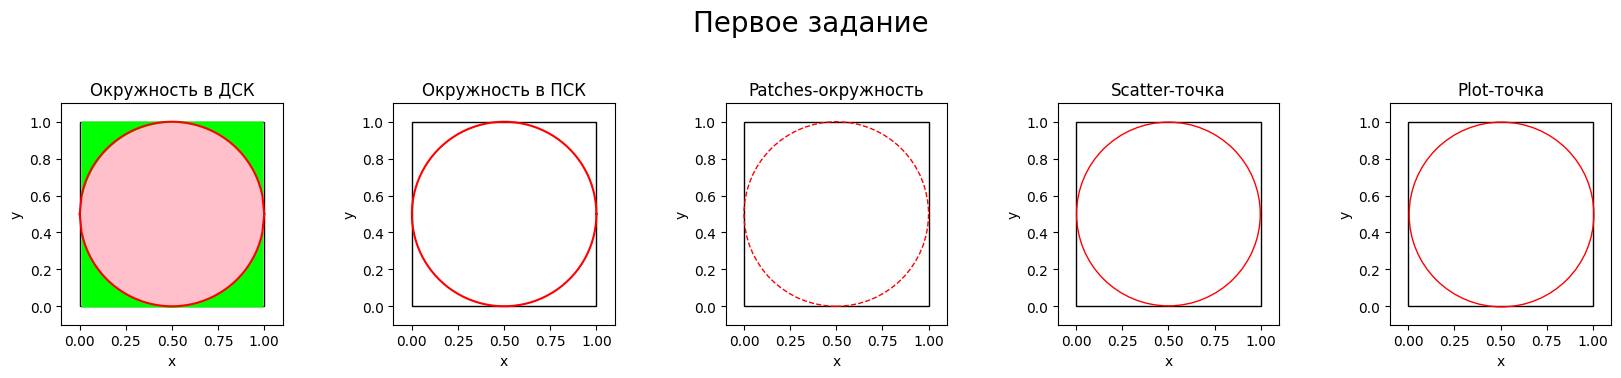

In [563]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

# Создаем фигуру и подписываем ее
fig, axs = plt.subplots(1, 5, figsize=(20, 10))
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Первое задание", fontsize = 20, y = 0.7)

# Создание осей координат и квадратов
for ax in axs:
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_aspect('equal')
    square = plt.Rectangle((0, 0), 1, 1, fill=False)
    ax.add_patch(square)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

# subplot 1: СОЗДАНИЕ ОКРУЖНОСТИ В ДСК
x = np.linspace(0, 1, 100)
y1, y2 = np.sqrt(0.5**2 - (x-0.5)**2) + 0.5, -np.sqrt(0.5**2 - (x-0.5)**2) + 0.5
axs[0].plot(x, y1, x, y2, color='red')
axs[0].set_title('Окружность в ДСК')

# Заливаем рисунок цветом
axs[0].fill_between(x, y1, y2, where=(y1 > y2), color='pink')
axs[0].fill_between(x, y1, 1, where=y1 > 0.5, color='lime')
axs[0].fill_between(x, y2, 0, where=y2 < 0.5, color='lime')

# subplot 2: СОЗДАНИЕ ОКРУЖНОСТИ В ПСК
ang = np.linspace(0, 2*np.pi, 100)
axs[1].plot(0.5*np.cos(ang)+0.5, 0.5*np.sin(ang)+0.5, color='red')
axs[1].set_title('Окружность в ПСК')

# subplot 3: СОЗДАНИЕ ОКРУЖНОСТИ ПРИ ПОМОЩИ PATCHES
ellipse = Ellipse(xy=(0.5, 0.5), width=1, height=1, linestyle='dashed', edgecolor='red', facecolor='none')
axs[2].add_patch(ellipse)
axs[2].set_title('Patches-окружность')

# subplot 4: СОЗДАНИЕ ОКРУЖНОСТИ ПРИ ПОМОЩИ SCATTER
axs[3].scatter(0.5, 0.5, s=17500, color = 'red', facecolor = 'none')
axs[3].set_title('Scatter-точка')

# subplot 5: СОЗДАНИЕ ОКРУЖНОСТИ ПРИ ПОМОЩИ PLOT
axs[4].plot(0.5, 0.5, marker='o', markersize=133, color='red', markerfacecolor='none')
axs[4].set_title('Plot-точка')

# Отображаем график
plt.show()

## Задание 2 $\textcolor{yellow}{[6\;баллов]}$
Проиллюстрируйте численный метод интегрирования функции $ \sin ^2 (x)$ на отрезке от 0 до $ 2 \pi $ [методом прямоугольников](https://ru.wikipedia.org/wiki/Метод_прямоугольников)

1. Создайте фигуру размера $8 \times 8$ дюймов, на которой проиллюстрирован метод средних прямоугольников. *(см. иллюстрацию)*. Будет полезно знать про [штриховку](https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html), [порядок](https://matplotlib.org/stable/gallery/misc/zorder_demo.html) отрисовки, функцию zip $\textcolor{yellow}{[2\;балла]}$

<details>
<summary>полезное применение zip</summary>
<br>
<pre class="hljs" style="display: block; overflow-x: auto; padding: 0.5em; background: rgb(43, 43, 43); color: rgb(186, 186, 186);">l = [<span class="hljs-number" style="color: rgb(104, 150, 186);">0</span>, <span class="hljs-number" style="color: rgb(104, 150, 186);">1</span>, <span class="hljs-number" style="color: rgb(104, 150, 186);">2</span>, <span class="hljs-number" style="color: rgb(104, 150, 186);">3</span>, <span class="hljs-number" style="color: rgb(104, 150, 186);">4</span>, <span class="hljs-number" style="color: rgb(104, 150, 186);">5</span>]
print(<span class="hljs-string" style="color: rgb(224, 196, 108);">'\tprv'</span>, <span class="hljs-string" style="color: rgb(224, 196, 108);">'\tcrn'</span>,<span class="hljs-string" style="color: rgb(224, 196, 108);">'\tnxt'</span>)
<span class="hljs-keyword" style="color: rgb(203, 120, 50);">for</span> prv, crn, nxt <span class="hljs-keyword" style="color: rgb(203, 120, 50);">in</span> zip(l, l[<span class="hljs-number" style="color: rgb(104, 150, 186);">1</span>:], l[<span class="hljs-number" style="color: rgb(104, 150, 186);">2</span>:]):
    print(<span class="hljs-string" style="color: rgb(224, 196, 108);">'\t'</span>, prv, <span class="hljs-string" style="color: rgb(224, 196, 108);">'\t'</span>, crn, <span class="hljs-string" style="color: rgb(224, 196, 108);">'\t'</span>, nxt)</pre>
</br>
</details>

2. Создайте фигуру, содержащую 4 **subplot**'a (3 наверху, 1 внизу), где на верхних **subplot**'ах  изображены
    1. слева - метод левых прямоугольников
    2. в центре - метод средних прямоугольников
    3. справа - метод правых прямоугольников

$\textcolor{yellow}{[2\;балла]}$

3. Внизу создайте логарифмический график с отношением полученных площадей 3-мя разными методами к действительной (аналитически посчитанной) области в зависимости от количеста разбиений $n$

$\textcolor{yellow}{[2\;балла]}$



![](task_2.png)

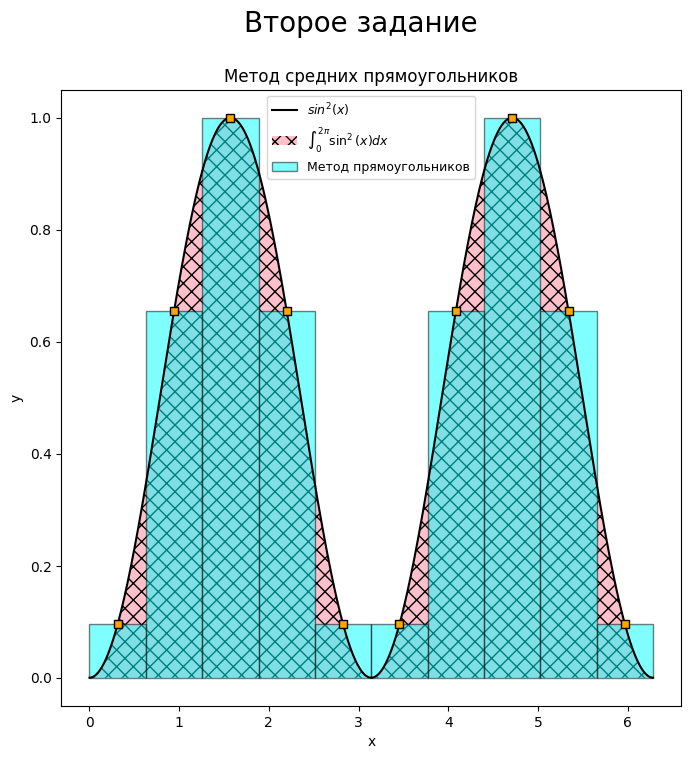

In [549]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем фигуру и подписываем ее
fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle("Второе задание", fontsize = 20)

# Создаем массивы значений x и y для графика sin^2(x)
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)**2

# Строим график sin^2(x)
ax.plot(x, y, color='black')
ax.fill_between(x, y, facecolor='pink', hatch='xx')

# Вычисляем средние прямоугольники
n = 10
dx = 2*np.pi/n
x_l = np.linspace(dx/2, 2*np.pi-dx/2, n)
y_l = np.sin(x_l)**2

# Строим прямоугольники на графике
for i in range(n):
    rect = plt.Rectangle((x_l[i]-dx/2, 0), dx, y_l[i], facecolor='cyan', edgecolor='black', alpha=0.5)
    ax.add_patch(rect)

# Добавляем легенду, подписываем рисунок и оси
ax.scatter(x_l, y_l, s = 30, marker = 's', facecolor='orange', edgecolor='black', zorder=2)
ax.legend(['$sin^2(x)$', '$\int_{0}^{2\pi} \sin^2(x)dx$', 'Метод прямоугольников'], loc='upper center', fontsize = 9)
ax.set_title('Метод средних прямоугольников', fontsize=12)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Отображаем график
plt.show()


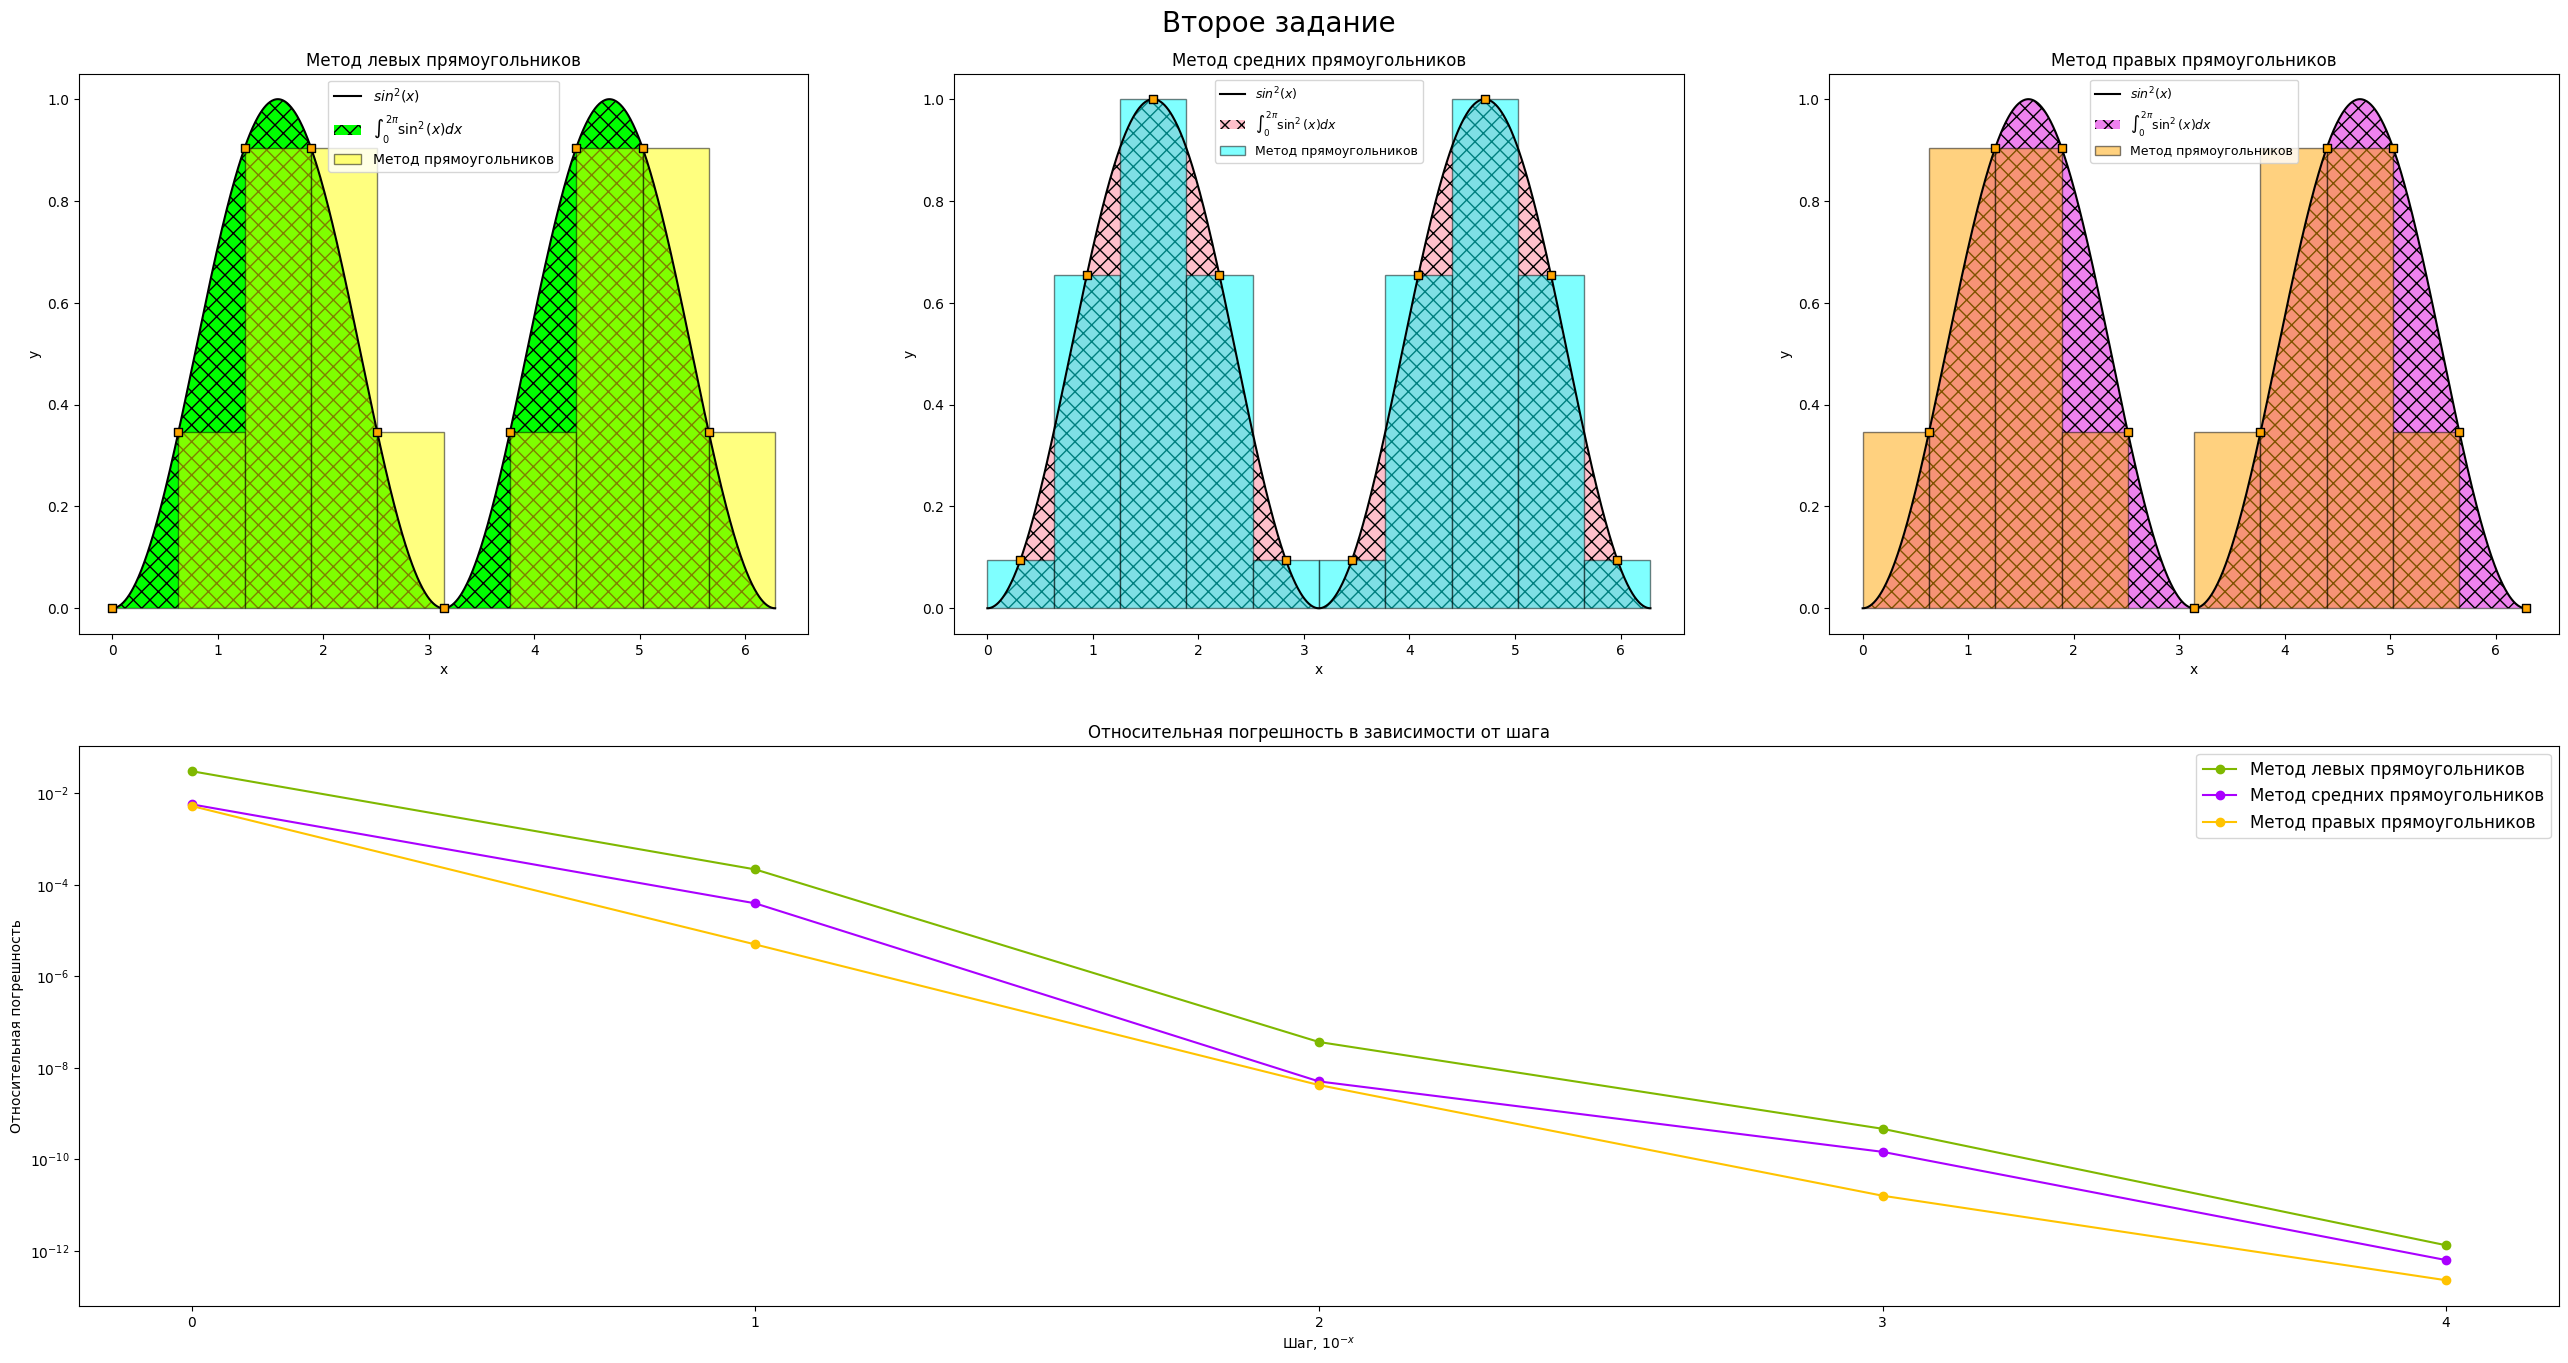

In [557]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем фигуру и подписываем ее
fig = plt.figure(figsize=(32, 16))
ax = [None for _ in range(4)]
ax[0] = plt.subplot2grid((2,3), (0,0), colspan=1)
ax[1] = plt.subplot2grid((2,3), (0,1), colspan=1)
ax[2] = plt.subplot2grid((2,3), (0,2), colspan=1)
ax[3] = plt.subplot2grid((2,3), (1,0), colspan=3)
fig.suptitle("Второе задание", fontsize = 20, y = 0.92)

n = 10 # Количество разбиений

# Создаем массивы значений x и y для графика sin^2(x)
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)**2

# subplot 1: МЕТОД ЛЕВЫХ ПРЯМОУГОЛЬНИКВ

# Строим график sin^2(x)
ax[0].plot(x, y, color='black')
ax[0].fill_between(x, y, facecolor='lime', hatch='xx')

# Вычисляем левые прямоугольники
dx = 2*np.pi/n
x_rect = np.linspace(0, 2*np.pi-dx, n)
y_rect = np.sin(x_rect)**2

# Строим прямоугольники на графике
for i in range(n):
    rect = plt.Rectangle((x_rect[i], 0), dx, y_rect[i], facecolor='yellow', edgecolor='black', alpha=0.5)
    ax[0].add_patch(rect)

# Добавляем легенду, подписываем рисунок и оси
ax[0].scatter(x_rect, y_rect, s = 30, marker = 's', facecolor='orange', edgecolor='black', zorder=2)
ax[0].legend(['$sin^2(x)$', '$\int_{0}^{2\pi} \sin^2(x)dx$', 'Метод прямоугольников'], loc='upper center', fontsize = 10)
ax[0].set_title('Метод левых прямоугольников', fontsize=12)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

# subplot 2: МЕТОД СРЕДНИХ ПРЯМОУГОЛЬНИКВ

# Строим график sin^2(x)
ax[1].plot(x, y, color='black')
ax[1].fill_between(x, y, facecolor='pink', hatch='xx')

# Вычисляем средние прямоугольники
dx = 2*np.pi/n
x_rect = np.linspace(dx/2, 2*np.pi-dx/2, n)
y_rect = np.sin(x_rect)**2

# Строим прямоугольники на графике
for i in range(n):
    rect = plt.Rectangle((x_rect[i]-dx/2, 0), dx, y_rect[i], facecolor='cyan', edgecolor='black', alpha=0.5)
    ax[1].add_patch(rect)

# Добавляем легенду, подписываем рисунок и оси
ax[1].scatter(x_rect, y_rect, s = 30, marker = 's', facecolor='orange', edgecolor='black', zorder=2)
ax[1].legend(['$sin^2(x)$', '$\int_{0}^{2\pi} \sin^2(x)dx$', 'Метод прямоугольников'], loc='upper center', fontsize = 9)
ax[1].set_title('Метод средних прямоугольников', fontsize=12)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

# subplot 3: МЕТОД ПРАВЫХ ПРЯМОУГОЛЬНИКВ

# Строим график sin^2(x)
ax[2].plot(x, y, color='black')
ax[2].fill_between(x, y, facecolor='#EE82EE', hatch='xx')

# Вычисляем правые прямоугольники
dx = 2*np.pi/n
x_rect = np.linspace(dx, 2*np.pi, n)
y_rect = np.sin(x_rect)**2

# Строим прямоугольники на графике
for i in range(n):
    rect = plt.Rectangle((x_rect[i]-dx, 0), dx, y_rect[i], facecolor='#FFA500', edgecolor='black', alpha=0.5)
    ax[2].add_patch(rect)

# Добавляем легенду, подписываем рисунок и оси
ax[2].scatter(x_rect, y_rect, s = 30, marker = 's', facecolor='orange', edgecolor='black', zorder=2)
ax[2].legend(['$sin^2(x)$', '$\int_{0}^{2\pi} \sin^2(x)dx$', 'Метод прямоугольников'], loc='upper center', fontsize = 9)
ax[2].set_title('Метод правых прямоугольников', fontsize=12)
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')

# subplot 4: ЛОГАРИФМИЧЕСКИЙ ГРАФИК

# Вычисляем аналитическое значение интеграла
I = np.pi

# Списки для хранения значений отношений площадей и точности разбиений
left = []
mid = []
right = []
n_list = []

# Вычисляем отношения площадей для различных значений точности
for n in range(0,5):

    pi_r= np.floor(np.pi * 10**(n)) / 10**n
    dx = 10**(-n)

    x_left = np.arange(0, 2*pi_r, dx)
    y_left = np.sin(x_left)**2
    S_left = np.sum(y_left*dx)
    left.append(np.abs(I - S_left)/I)

    x_mid = np.arange(dx/2, 2*pi_r + dx/2, dx)
    y_mid = np.sin(x_mid)**2
    S_mid = np.sum(y_mid*dx)
    mid.append(np.abs(I - S_mid)/I)

    x_right = np.arange(dx, 2*pi_r + dx, dx)
    y_right = np.sin(x_right)**2
    S_right = np.sum(y_right*dx)
    right.append(np.abs(I - S_right)/I)

    n_list.append(n)

# Строим логарифмический график
ax[3].set_xticks([0,1,2,3,4])
ax[3].semilogy(n_list, left, '-o', label='Метод левых прямоугольников', color = '#7FB800')
ax[3].semilogy(n_list, mid, '-o', label='Метод средних прямоугольников', color = '#AA00FF')
ax[3].semilogy(n_list, right, '-o', label='Метод правых прямоугольников', color = '#FFC300')

# Добавляем легенду, подписываем рисунок и оси
ax[3].legend(fontsize=12)
ax[3].set_title('Относительная погрешность в зависимости от шага', fontsize=12)
ax[3].set_xlabel('Шаг, $10^{-x}$')
ax[3].set_ylabel('Относительная погрешность')


# Отображаем график
plt.show()

# Задание 3 $\textcolor{yellow}{[6\;баллов]}$

"Разбросайте" 100 разноцветных точек по плоскости [таким образом](https://matplotlib.org/stable/gallery/axes_grid1/scatter_hist_locatable_axes.html#sphx-glr-gallery-axes-grid1-scatter-hist-locatable-axes-py), чтобы:
1. По оси $x$ [нормальный](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) разброс был в 2 раза больше, чем по оси $y$ $\textcolor{yellow}{[2\;балла]}$
2. Были построены гистограммы распределения точек по координатам $\textcolor{yellow}{[2\;балла]}$
3. Можно было [управлять](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) соотношением цветов. И соответсвующее соотношение цветов (количество точек каждого цвета) показывалось бы в столбчатой диаграмме $\textcolor{yellow}{[2\;балла]}$ 

![](task_3.jpg)

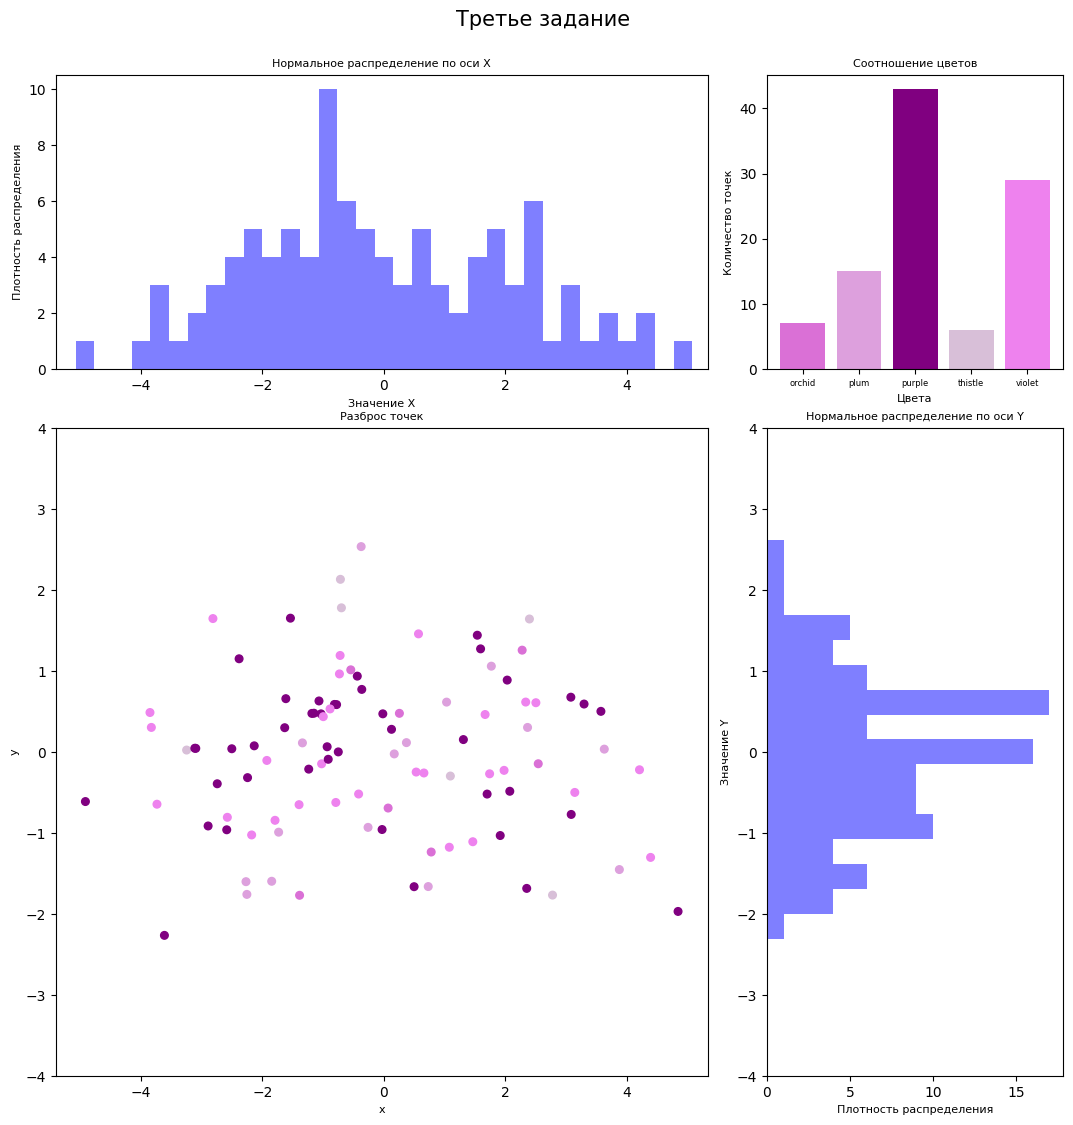

In [556]:
import matplotlib.pyplot as plt
import numpy as np

# Создаем фигуру и подписываем ее
fig = plt.figure(figsize=(13, 13))
ax = [None for _ in range(4)]
ax[0] = plt.subplot2grid((3,3), (0,0), colspan=2)
ax[1] = plt.subplot2grid((3,3), (0,2), colspan=1)
ax[2] = plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2)
ax[3] = plt.subplot2grid((3,3), (1,2), rowspan=2)
fig.suptitle('Третье задание', fontsize = 15, y = 0.93)

# Создаем массивы значений x и y
x = np.random.randn(100) * 2
y = np.random.randn(100)

# subplot 3: РАЗНОЦВЕТНЫЕ ТОЧКИ
colors = ['thistle', 'plum', 'violet', 'orchid', 'purple']
p = [0.1, 0.1, 0.3, 0.1, 0.4] # Управление соотношением цветов
points_color = np.random.choice(colors, p=p, size=len(x))
ax[2].scatter(x, y, c=points_color, s = 30, alpha=1)

# Подписываем рисунок и оси
ax[2].set_ylim(-4,4)
ax[2].set_title('Разброс точек', fontsize=8)
ax[2].set_xlabel('x', fontsize=8)
ax[2].set_ylabel('y', fontsize=8)

# subplot 1: ГИСТОГРАММА РАСПРЕДЕЛЕНИЯ ТОЧЕК ПО ОСИ X
bins = np.linspace(-6, 6, 40)
ax[0].hist(x, bins=bins, color='blue', alpha=0.5, density=False)

# Подписываем рисунок и оси
ax[0].set_title('Нормальное распределение по оси X', fontsize=8)
ax[0].set_xlabel('Значение X', fontsize=8)
ax[0].set_ylabel('Плотность распределения', fontsize=8)
ax[0].set_xlim(ax[2].get_xlim())

# subplot 4: ГИСТОГРАММА РАСПРЕДЕЛЕНИЯ ТОЧЕК ПО ОСИ Y
bins = np.linspace(-6, 6, 40)
ax[3].hist(y, bins=bins, color='blue', alpha=0.5, density=False, orientation='horizontal')

# Подписываем рисунок и оси
ax[3].set_title('Нормальное распределение по оси Y', fontsize=8)
ax[3].set_xlabel('Плотность распределения', fontsize=8)
ax[3].set_ylabel('Значение Y', fontsize=8)
ax[3].set_ylim(-4,4)

# subplot 2: СТОЛБЧАТАЯ ДИАГРАММА СООТНОШЕНИЯ ЦВЕТОВ
unique_colors, counts = np.unique(points_color, return_counts=True) # Считаем количество точек для каждого цвета
ax[1].bar(unique_colors, counts, color=unique_colors)

# Подписываем рисунок и оси
ax[1].set_title('Соотношение цветов', fontsize=8)
ax[1].set_xlabel('Цвета', fontsize=8)
ax[1].set_ylabel('Количество точек', fontsize=8)
ax[1].tick_params(axis='x', labelsize=6)

# Отображаем графики
plt.show()
